In [217]:
import yfinance as yf
import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as pdr
from pandas_datareader import data
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np
from matplotlib.ticker import FuncFormatter

import numpy as np  #NUMPY ES PARA HACER CALCULO ENTRE MATRICES
import matplotlib   #PARA GRAFICAR
import matplotlib.pyplot as plt 
from scipy import stats  #PARA SACAR LAS ESTADISTICAS, R2, PRUEBAS, ETC.
import seaborn as sns; sns.set() #PARA CREAR PLOTS
import warnings  #PARA CONTROLAR LAS ADVERTENCIAS
import itertools #ES PARA HACER FUNCIONES ITERABLES
import datetime


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix

In [218]:
#ELEGIMOS EL ACTIVO (CAMBIANDO EL TICKER PUEDE ANALIZAR LA ACCIÓN QUE QUIERA)
asset = input("Ingresá el ticker de la acción que quiere analizar y presioná Enter: ") 
ticker = yf.Ticker(asset)
ind_ticker = "^GSPC"
ind = yf.Ticker(ind_ticker) #Este es el SyP 500, si quiere ponga el colcap
period_asset = "ytd"
# get historical market data
hist = ticker.history(period=period_asset)
hist_ind = ind.history(period=period_asset)
#print(hist)

In [219]:
#Armar el dataset
df = pd.DataFrame(hist)
df_ind = pd.DataFrame(hist_ind)

In [220]:
#hacer que el índice tenga nombre de columna
df.index.name = "Date"
df_ind.index.name = "Date"
#df_ind.tail(21)

In [222]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [223]:
fig = go.Figure(
    data = [go.Candlestick(x= df.index, 
                           low = df["Low"], 
                           high= df["High"], 
                           open=df["Open"], 
                           close=df["Close"],
                           increasing_line_color = "green",
                           decreasing_line_color = "red")
    ]
    )
fig.update_layout(xaxis_rangeslider_visible=False,
                   title="Precio de Cierre de {}".format(asset),
                  yaxis_title='Precio',)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [224]:
df["MA20"] = df["Close"].rolling(20).mean()
df["MA200"] = df["Close"].rolling(200).mean()

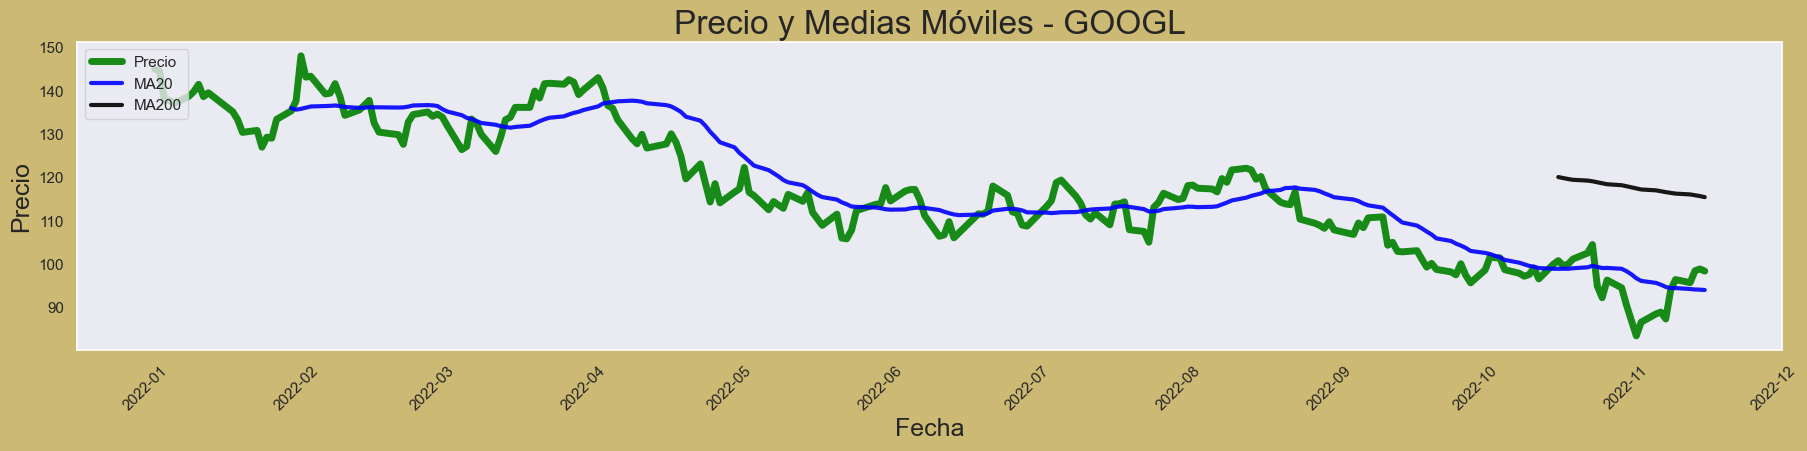

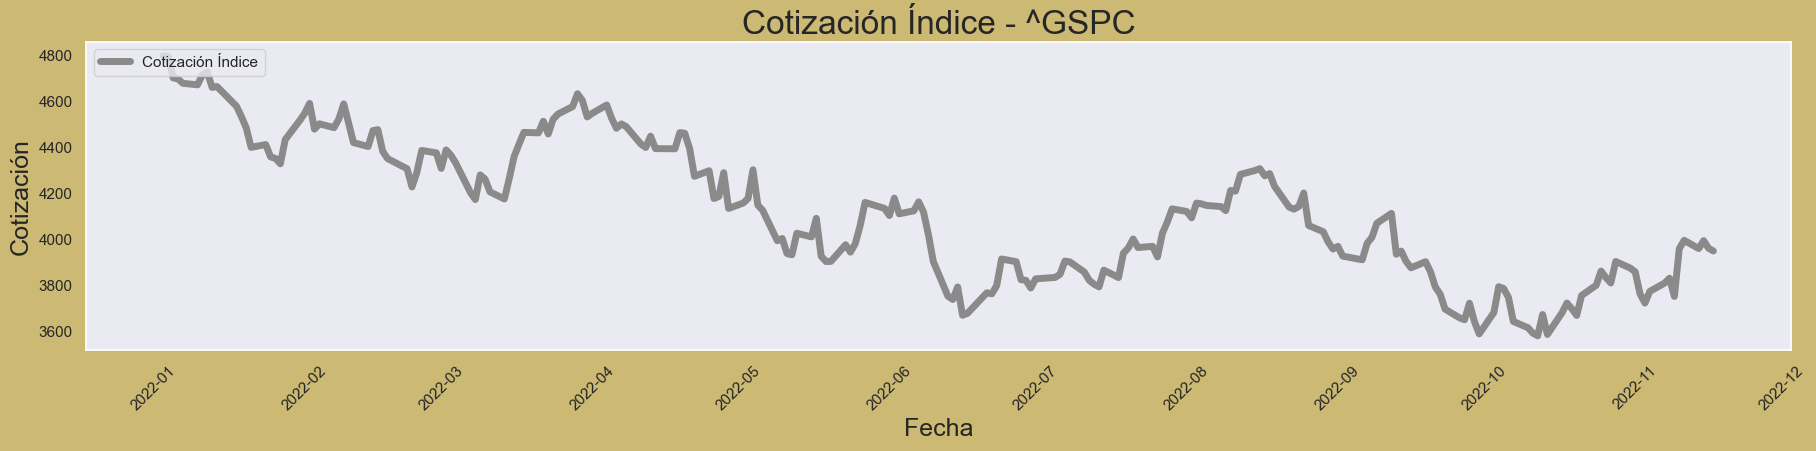

In [225]:
#plot the data
plt.figure(figsize=(22,4), facecolor="y")
plt.title("Precio y Medias Móviles - {}".format(asset), fontsize = 24)
plt.plot(df["Close"], label = "Precio", color = "green", alpha = 0.9,lw = 5)
plt.plot(df["MA20"], label = "MA20", color = "blue", alpha = 0.9,lw = 3)
plt.plot(df["MA200"], label = "MA200", color = "black", alpha = 0.9,lw = 3)
plt.ylabel("Precio", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper left")
plt.grid()
plt.show()

plt.figure(figsize=(22,4), facecolor="y")
plt.title("Cotización Índice - {}".format(ind_ticker), fontsize = 24)
plt.plot(df_ind["Close"], label = "Cotización Índice", color = "grey", alpha = 0.9,lw = 5)
plt.ylabel("Cotización", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper left")
plt.grid()
plt.show()

In [226]:
print("Estadística Descriptiva del Precio de Cierre de {}.\nPeríodo: {}".format(asset,period_asset))
df.Close.describe()

Estadística Descriptiva del Precio de Cierre de GOOGL.
Período: ytd


count    222.000000
mean     117.513527
std       15.001746
min       83.430000
25%      107.235126
50%      115.403248
75%      130.703751
max      148.000000
Name: Close, dtype: float64

In [227]:
print("Estadística Descriptiva del Precio de Cierre de {}.\nPeríodo: {}".format(ind_ticker,period_asset))
df_ind.Close.describe()

Estadística Descriptiva del Precio de Cierre de ^GSPC.
Período: ytd


count     222.000000
mean     4119.789556
std       302.397921
min      3577.030029
25%      3872.317505
50%      4117.199951
75%      4383.552368
max      4796.560059
Name: Close, dtype: float64

In [231]:
print("Retornos Diarios de {} en %.\nÚltimas 10 ruedas".format(asset,period_asset))
#month = df.Close.resample('M').last()agg(lambda x: (x[-1] / x[1]) - 1)
daily_ret = df.Close.pct_change()
daily_ret_ind = df_ind.Close.pct_change()
df["Return"] = df.Close.pct_change()
df_ind["Return"] = df_ind.Close.pct_change()
daily_ret.tail(10)

Retornos Diarios de GOOGL en %.
Últimas 10 ruedas


Date
2022-11-04 00:00:00-04:00    0.037756
2022-11-07 00:00:00-05:00    0.022060
2022-11-08 00:00:00-05:00    0.004633
2022-11-09 00:00:00-05:00   -0.017773
2022-11-10 00:00:00-05:00    0.075813
2022-11-11 00:00:00-05:00    0.026293
2022-11-14 00:00:00-05:00   -0.007364
2022-11-15 00:00:00-05:00    0.028631
2022-11-16 00:00:00-05:00    0.004165
2022-11-17 00:00:00-05:00   -0.004957
Name: Close, dtype: float64

In [229]:
daily_ret_ind.tail(15)

Date
2022-10-28 00:00:00-04:00    0.024626
2022-10-31 00:00:00-04:00   -0.007454
2022-11-01 00:00:00-04:00   -0.004101
2022-11-02 00:00:00-04:00   -0.025002
2022-11-03 00:00:00-04:00   -0.010586
2022-11-04 00:00:00-04:00    0.013619
2022-11-07 00:00:00-05:00    0.009614
2022-11-08 00:00:00-05:00    0.005598
2022-11-09 00:00:00-05:00   -0.020778
2022-11-10 00:00:00-05:00    0.055434
2022-11-11 00:00:00-05:00    0.009241
2022-11-14 00:00:00-05:00   -0.008936
2022-11-15 00:00:00-05:00    0.008713
2022-11-16 00:00:00-05:00   -0.008252
2022-11-17 00:00:00-05:00   -0.003089
Name: Close, dtype: float64

In [232]:
#daily logarithm return 
print("Retornos Logarítmicos Diarios de {} en %.\nÚltimas 10 ruedas".format(asset,period_asset))
#month = df.Close.resample('M').last()agg(lambda x: (x[-1] / x[1]) - 1)
df["Log_Return"] = np.log(df.Close).diff()
df_ind["Log_Return"] = np.log(df_ind.Close).diff()
df["Log_Return"]

Retornos Logarítmicos Diarios de GOOGL en %.
Últimas 10 ruedas


Date
2022-01-03 00:00:00-05:00         NaN
2022-01-04 00:00:00-05:00   -0.004091
2022-01-05 00:00:00-05:00   -0.046962
2022-01-06 00:00:00-05:00   -0.000200
2022-01-07 00:00:00-05:00   -0.005317
                               ...   
2022-11-11 00:00:00-05:00    0.025954
2022-11-14 00:00:00-05:00   -0.007392
2022-11-15 00:00:00-05:00    0.028229
2022-11-16 00:00:00-05:00    0.004156
2022-11-17 00:00:00-05:00   -0.004969
Name: Log_Return, Length: 222, dtype: float64

In [233]:
print("Retornos Mensuales de {} en %.\nPeríodo: {}".format(asset,period_asset))
#month = df.Close.resample('M').last()agg(lambda x: (x[-1] / x[1]) - 1)
month3 = df.Close.resample('M').agg(lambda x: x[-1] / x[1] - 1) * 100
month3

Retornos Mensuales de GOOGL en %.
Período: ytd


Date
2022-01-31 00:00:00-05:00    -6.299196
2022-02-28 00:00:00-05:00    -8.745266
2022-03-31 00:00:00-04:00     3.340976
2022-04-30 00:00:00-04:00   -20.187240
2022-05-31 00:00:00-04:00    -3.044300
2022-06-30 00:00:00-04:00    -7.362112
2022-07-31 00:00:00-04:00     2.699027
2022-08-31 00:00:00-04:00    -6.001908
2022-09-30 00:00:00-04:00   -11.312005
2022-10-31 00:00:00-04:00    -7.014952
2022-11-30 00:00:00-05:00    13.096469
Freq: M, Name: Close, dtype: float64

In [234]:
df["Cumulative_Return"] = (1 + df["Return"]).cumprod()
df_ind["Cumulative_Return"] = (1 + df_ind["Return"]).cumprod()

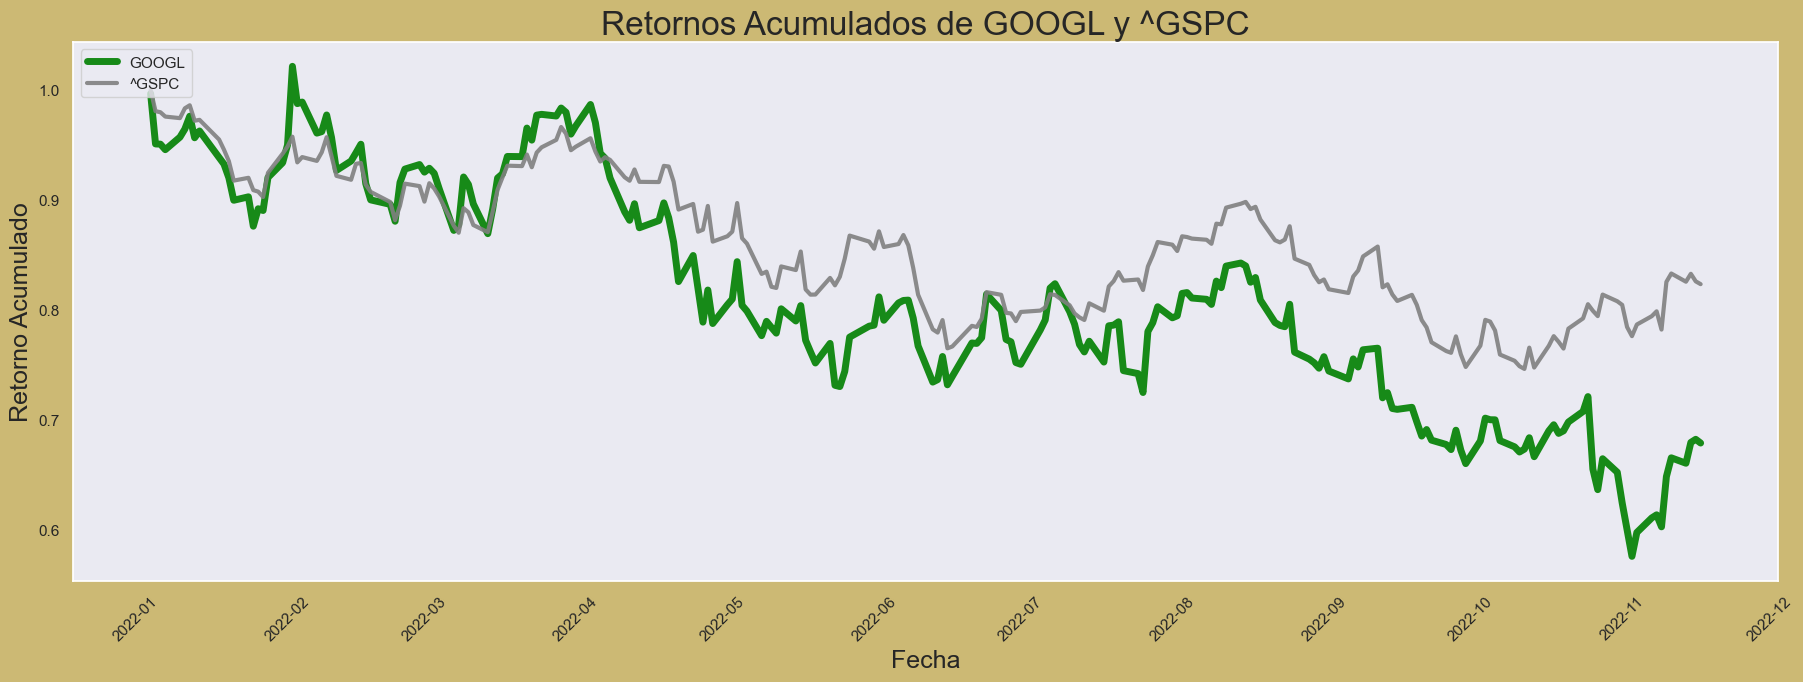

In [235]:
#plot the data
plt.figure(figsize=(22,7), facecolor="y")
plt.title("Retornos Acumulados de {} y {}".format(asset, ind_ticker), fontsize = 24)
plt.plot(df["Cumulative_Return"], label = asset, color = "green", alpha = 0.9,lw = 5)
plt.plot(df_ind["Cumulative_Return"], label = ind_ticker, color = "grey", alpha = 0.9,lw = 3)
plt.ylabel("Retorno Acumulado", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper left")
plt.grid()
plt.show()

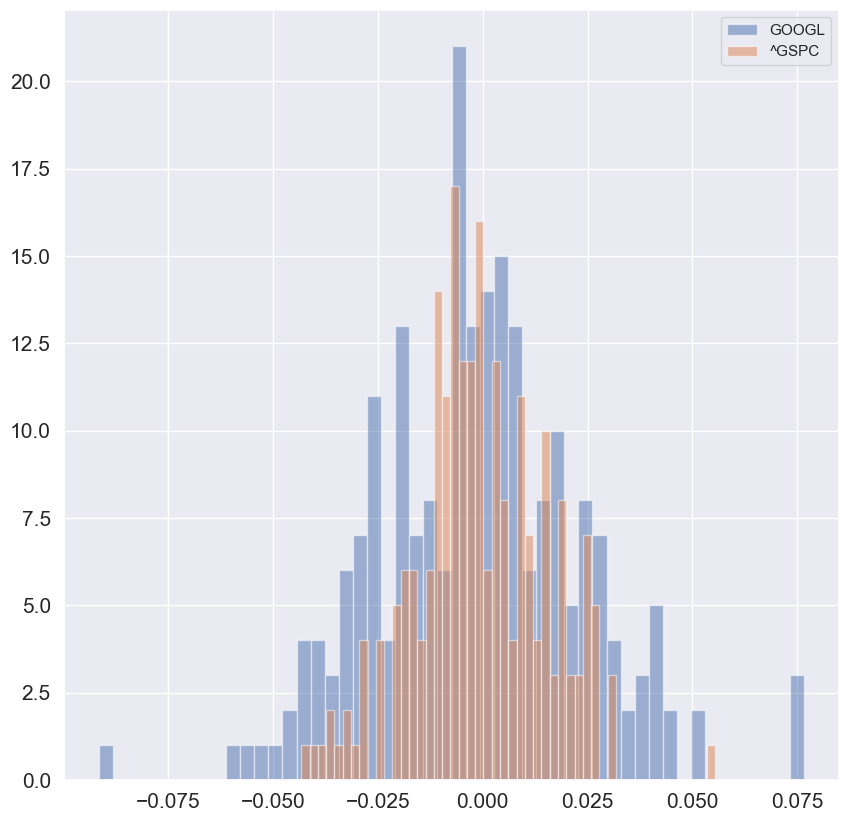

In [236]:

daily_ret.hist(bins=50, figsize= (10,10), xlabelsize= 15,ylabelsize= 15, label = asset, alpha = 0.5)
daily_ret_ind.hist(bins=50, figsize= (10,10), xlabelsize= 15,ylabelsize= 15, label = ind_ticker, alpha = 0.5)
plt.legend()

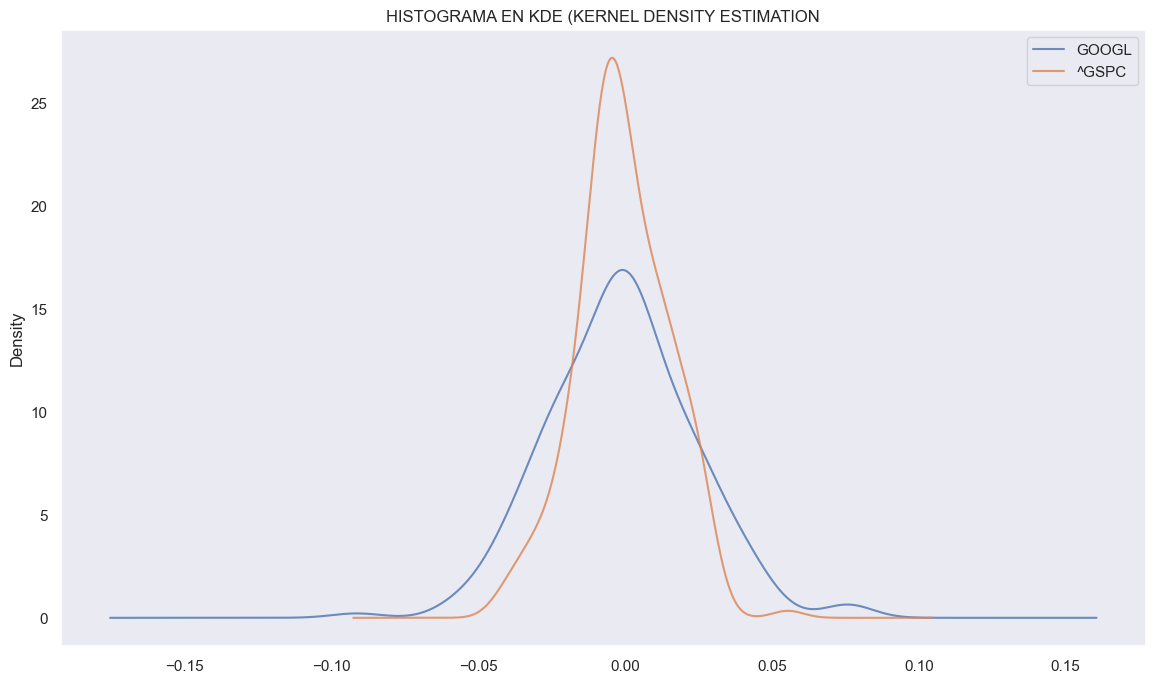

In [237]:
daily_ret.plot(kind = "kde", figsize= (14,8), label = asset, alpha = 0.8)
daily_ret_ind.plot(kind = "kde", figsize= (14,8), label = ind_ticker, alpha = 0.8)
plt.legend()
plt.title("HISTOGRAMA EN KDE (KERNEL DENSITY ESTIMATION")
plt.grid()

In [238]:
#Concatenar las series de retornos diarios
box_df = pd.concat([daily_ret, daily_ret_ind], axis=1)
box_df.columns =["Rendimiento Diario de {}".format(asset), "Rendimiento Diario de {}".format(ind_ticker)]

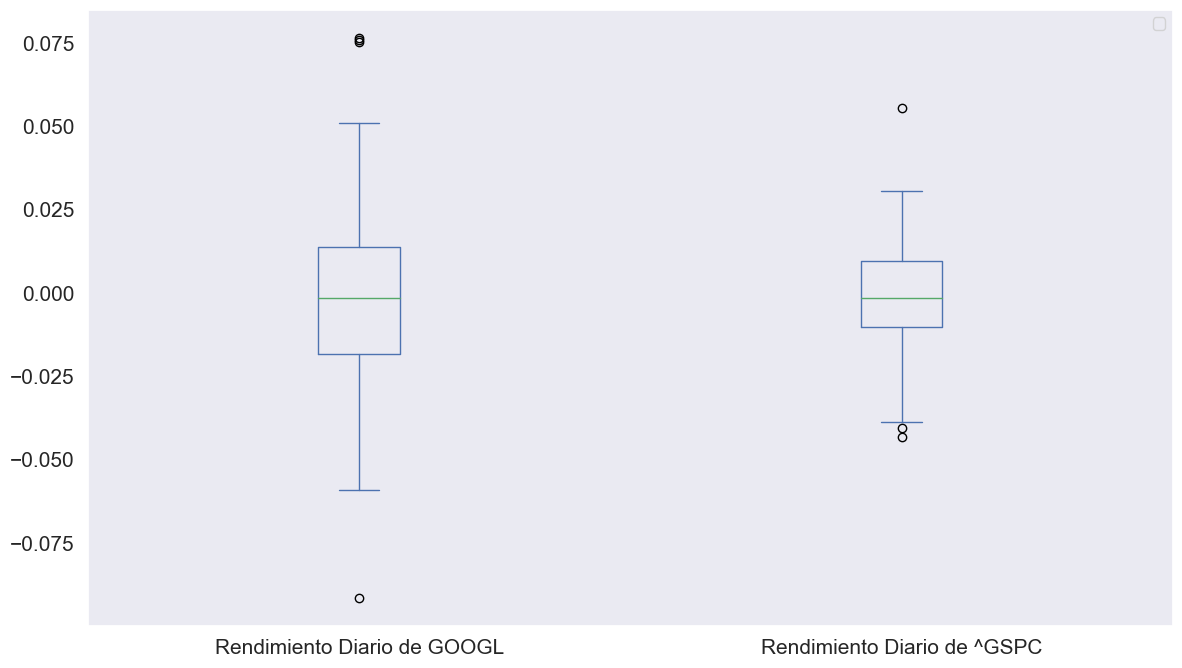

In [239]:
box_df.plot(kind = "box", figsize= (14,8) ,fontsize = 15)
plt.legend(daily_ret, daily_ret_ind)
plt.grid()

In [240]:
#armamos un df con ambos retornos
df_slr = pd.concat([df["Return"] ,df_ind["Return"]], axis=1)
df_slr.dropna(inplace=True)
df_slr.columns = ["Asset_Return", "Indice_Return"]


In [241]:
df_slr

,Asset_Return,Indice_Return
Date,,
2022-01-04 00:00:00-05:00,-0.004083,-0.000630
2022-01-05 00:00:00-05:00,-0.045876,-0.019393
2022-01-06 00:00:00-05:00,-0.000200,-0.000964
2022-01-07 00:00:00-05:00,-0.005303,-0.004050
2022-01-10 00:00:00-05:00,0.012061,-0.001441
...,...,...
2022-11-11 00:00:00-05:00,0.026293,0.009241
2022-11-14 00:00:00-05:00,-0.007364,-0.008936
2022-11-15 00:00:00-05:00,0.028631,0.008713


In [242]:
import statsmodels.formula.api as sm
model = sm.ols(formula = "Asset_Return~Indice_Return",data = df_slr).fit()

In [243]:
print(model.summary()) #informe completo

                            OLS Regression Results                            
Dep. Variable:           Asset_Return   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     523.2
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           5.83e-60
Time:                        20:53:35   Log-Likelihood:                 637.70
No. Observations:                 221   AIC:                            -1271.
Df Residuals:                     219   BIC:                            -1265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0004      0.001     -0.467

In [244]:
 predicciones = model.predict() #prediciones
 predicciones = pd.Series(predicciones)

In [245]:
#Armo un dataset que una los precios de cierre
rls = pd.concat([df["Close"], df_ind["Close"]], axis=1)
rls.dropna(inplace=True)
rls.columns = ["Asset_Close", "Indice_Close"]
rls.tail(5)

,Asset_Close,Indice_Close
Date,,
2022-11-11 00:00:00-05:00,96.410004,3992.929932
2022-11-14 00:00:00-05:00,95.699997,3957.250000
2022-11-15 00:00:00-05:00,98.440002,3991.729980
2022-11-16 00:00:00-05:00,98.849998,3958.790039
2022-11-17 00:00:00-05:00,98.360001,3946.560059


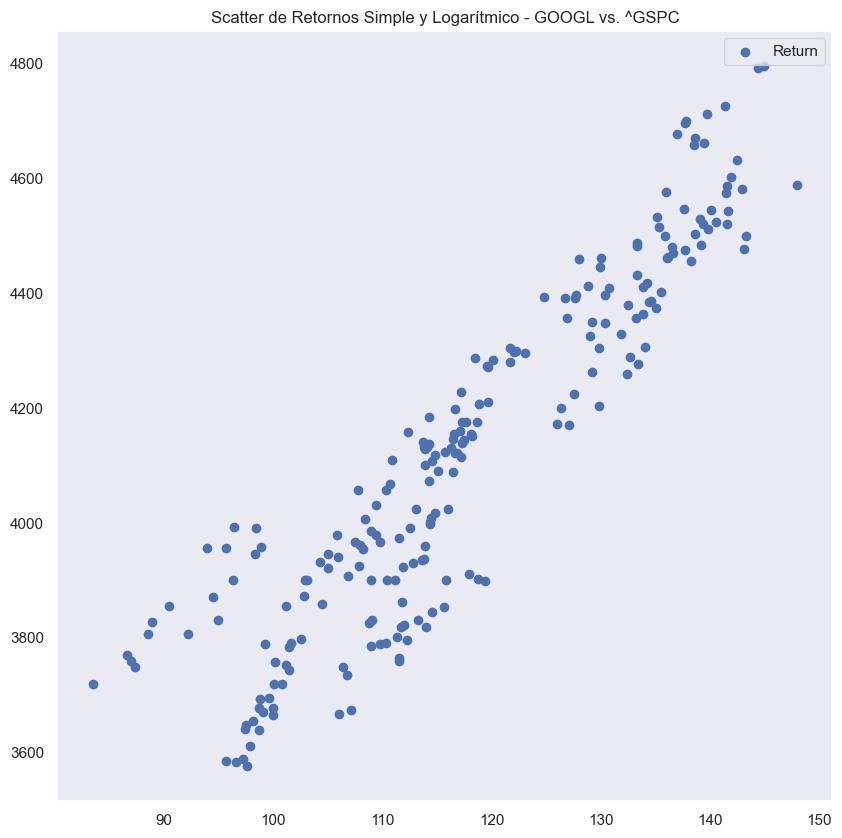

In [246]:
#Scatter de Retornos Simple y Logarítmico y Linea de Ajsute (sobre Ret Simple)

plt.figure(figsize = (10,10))
plt.scatter(rls["Asset_Close"] ,rls["Indice_Close"], label= "Return"  )
plt.title("Scatter de Retornos Simple y Logarítmico - {} vs. {}".format(asset, ind_ticker))
#plt.plot(rls["Asset_Close"][1:],model.predict(),color = 'red', label = "fitted linear regression straight line") #usamos el retorno simple
plt.legend()
plt.grid()
plt.show()

array([[<AxesSubplot: xlabel='Asset_Close', ylabel='Asset_Close'>,
        <AxesSubplot: xlabel='Indice_Close', ylabel='Asset_Close'>],
       [<AxesSubplot: xlabel='Asset_Close', ylabel='Indice_Close'>,
        <AxesSubplot: xlabel='Indice_Close', ylabel='Indice_Close'>]],
      dtype=object)

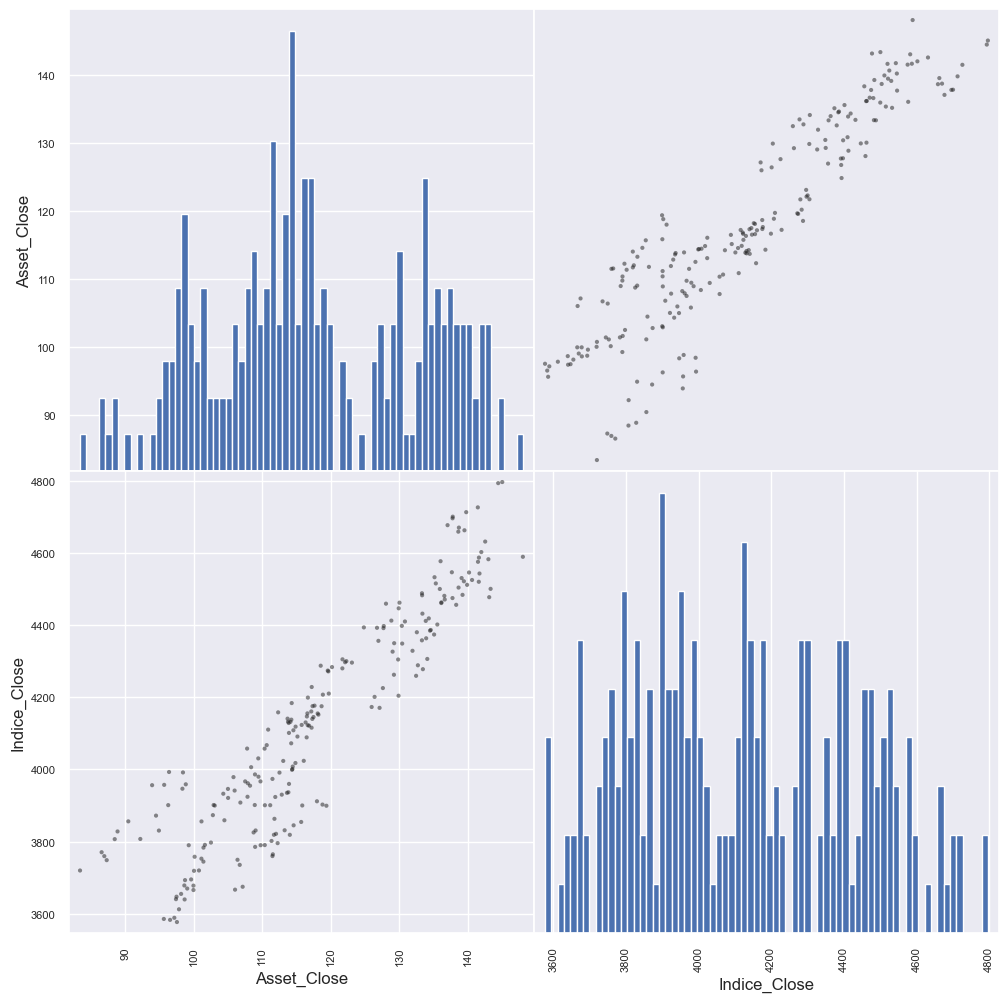

In [247]:
scatter_matrix(rls, figsize= (12,12), hist_kwds= {"bins" : 70}, facecolor="k", grid=False)

In [248]:
# 

from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(rls["Asset_Close"] ,rls["Indice_Close"])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.920


In [249]:
print("Máximo Mensual de {} (En $).\nPeríodo: {}".format(asset,period_asset))
monthly_max = df["Close"].resample("M").max()
monthly_max

Máximo Mensual de GOOGL (En $).
Período: ytd


Date
2022-01-31 00:00:00-05:00    144.991501
2022-02-28 00:00:00-05:00    148.000000
2022-03-31 00:00:00-04:00    142.505493
2022-04-30 00:00:00-04:00    142.971497
2022-05-31 00:00:00-04:00    122.261002
2022-06-30 00:00:00-04:00    117.974998
2022-07-31 00:00:00-04:00    119.353500
2022-08-31 00:00:00-04:00    122.080002
2022-09-30 00:00:00-04:00    110.860001
2022-10-31 00:00:00-04:00    104.480003
2022-11-30 00:00:00-05:00     98.849998
Freq: M, Name: Close, dtype: float64

In [250]:
print("Mínimo Mensual de {} (En $).\nPeríodo: {}".format(asset,period_asset))
monthly_min = df["Close"].resample("M").min()
monthly_min

Mínimo Mensual de GOOGL (En $).
Período: ytd


Date
2022-01-31 00:00:00-05:00    126.934998
2022-02-28 00:00:00-05:00    127.587997
2022-03-31 00:00:00-04:00    125.950996
2022-04-30 00:00:00-04:00    114.109497
2022-05-31 00:00:00-04:00    105.805000
2022-06-30 00:00:00-04:00    106.033501
2022-07-31 00:00:00-04:00    105.019997
2022-08-31 00:00:00-04:00    108.220001
2022-09-30 00:00:00-04:00     95.650002
2022-10-31 00:00:00-04:00     92.220001
2022-11-30 00:00:00-05:00     83.430000
Freq: M, Name: Close, dtype: float64

In [251]:
print("Mínimo Semanal de {} (En $).\nPeríodo: {}".format(asset,period_asset))
weekly_min = df["Close"].resample("W").min()
#weekly_min

Mínimo Semanal de GOOGL (En $).
Período: ytd


In [252]:
print("Precios Promedio Mensuales de {}.\nPeríodo: {}".format(asset,period_asset))
monthly_avg = df["Close"].resample("M").mean()
monthly_avg

Precios Promedio Mensuales de GOOGL.
Período: ytd


Date
2022-01-31 00:00:00-05:00    135.961949
2022-02-28 00:00:00-05:00    136.712895
2022-03-31 00:00:00-04:00    134.977957
2022-04-30 00:00:00-04:00    128.071250
2022-05-31 00:00:00-04:00    113.194119
2022-06-30 00:00:00-04:00    112.429524
2022-07-31 00:00:00-04:00    112.650724
2022-08-31 00:00:00-04:00    116.258696
2022-09-30 00:00:00-04:00    103.330000
2022-10-31 00:00:00-04:00     98.878571
2022-11-30 00:00:00-05:00     91.835385
Freq: M, Name: Close, dtype: float64

In [253]:
print("Precios Mensuales Superiores al Promedio {}.\nPeríodo: {}".format(asset,period_asset))

monthly_avg_sup =  df.resample('M').last() 
above = monthly_avg_sup[monthly_avg_sup.Close > np.mean(monthly_avg_sup.Close)]
above["Close"]

Precios Mensuales Superiores al Promedio GOOGL.
Período: ytd


Date
2022-01-31 00:00:00-05:00    135.303497
2022-02-28 00:00:00-05:00    135.057007
2022-03-31 00:00:00-04:00    139.067505
2022-07-31 00:00:00-04:00    116.320000
Name: Close, dtype: float64

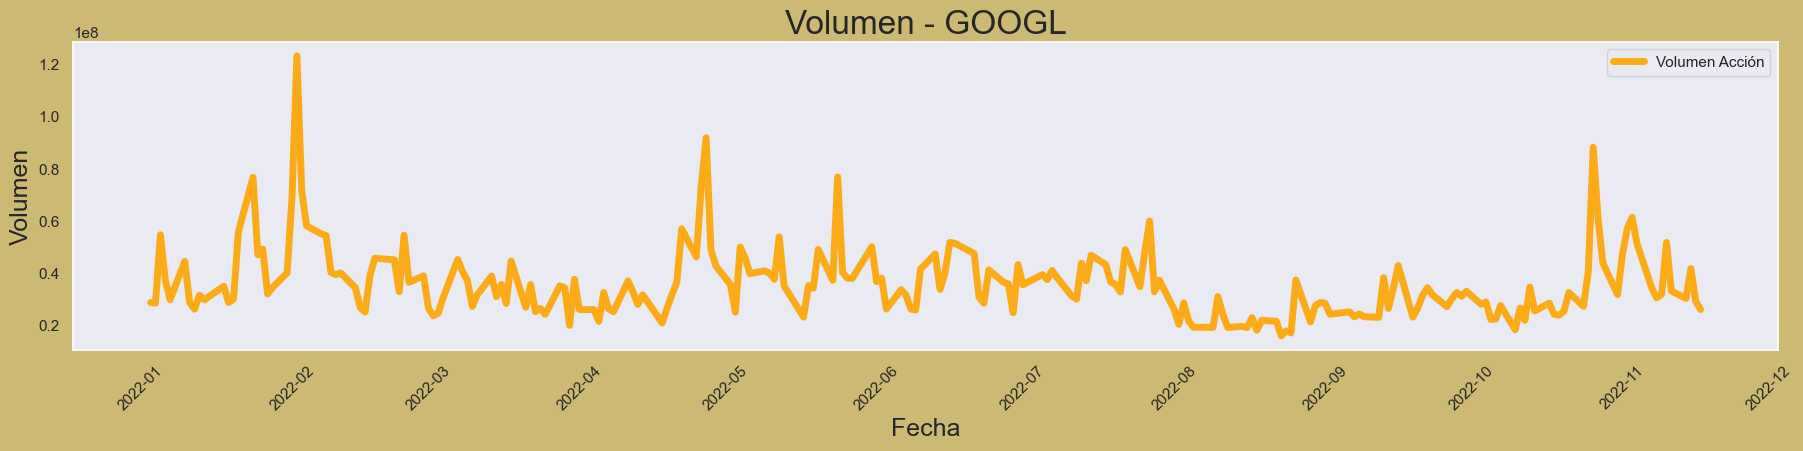

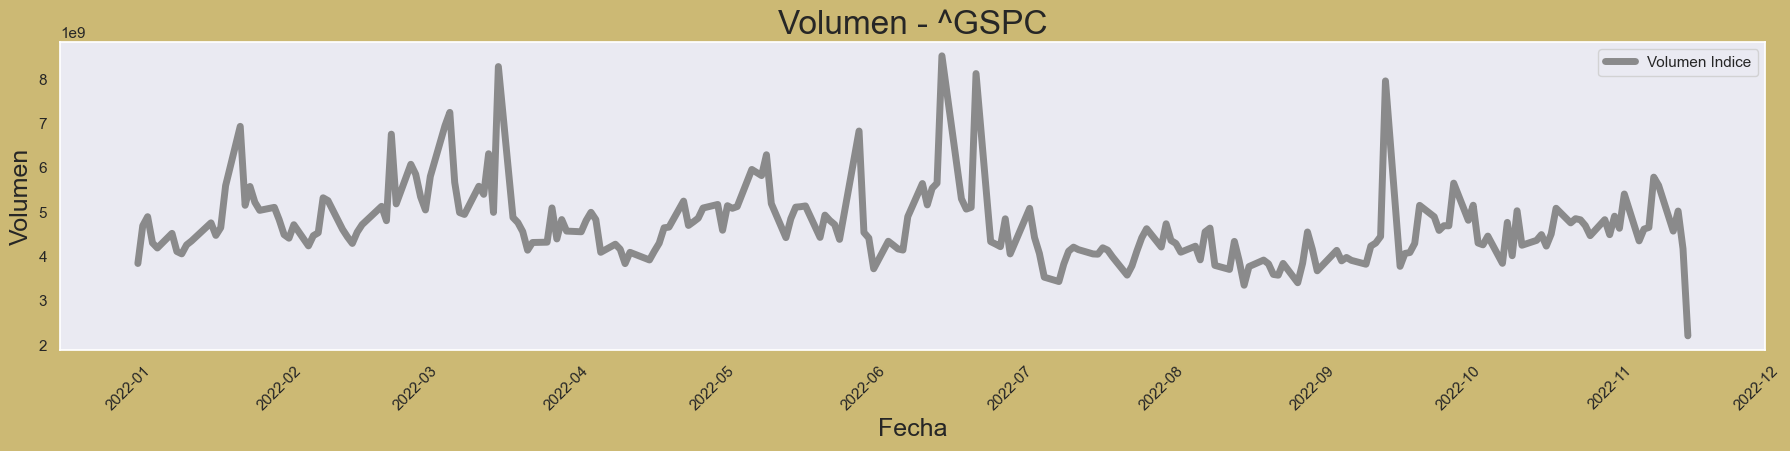

In [254]:
#plot the data
plt.figure(figsize=(22,4), facecolor="y")
plt.title("Volumen - {}".format(asset), fontsize = 24)
plt.plot(df["Volume"], label = "Volumen Acción", color = "orange", alpha = 0.9,lw = 5)
plt.ylabel("Volumen", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper right")
plt.grid()
plt.show()

plt.figure(figsize=(22,4), facecolor="y")
plt.title("Volumen - {}".format(ind_ticker), fontsize = 24)
plt.plot(df_ind["Volume"], label = "Volumen Indice", color = "grey", alpha = 0.9,lw = 5)
plt.ylabel("Volumen", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper right")
plt.grid()
plt.show()

In [255]:
factor = 1.5
previous_average_volume = df["Volume"].iloc[-21:-1:1].mean() #promedio de los últimos
todays_volume = df["Volume"][-1]

if todays_volume > previous_average_volume * factor:
  print("Alerta de VOLUMEN EXTRAORDINARIO en {}!!\n".format(asset))

if todays_volume > previous_average_volume:
  print("El Volumen es SUPERIOR al Promedio\n")
else:
  print("El Volumen es INFERIOR al Promedio\n")

print("El Volumen Promedio de los 20 dias anteriores es: ", previous_average_volume)
print("El volumen del último día es: ", todays_volume)

El Volumen es INFERIOR al Promedio

El Volumen Promedio de los 20 dias anteriores es:  42412770.0
El volumen del último día es:  25965563


In [256]:
df["Total_Negociado"] = (df["Open"] + df["Close"]) / 2 * df["Volume"]
df_ind["Total_Negociado"] = (df_ind["Open"] + df_ind["Close"]) / 2 * df_ind["Volume"]

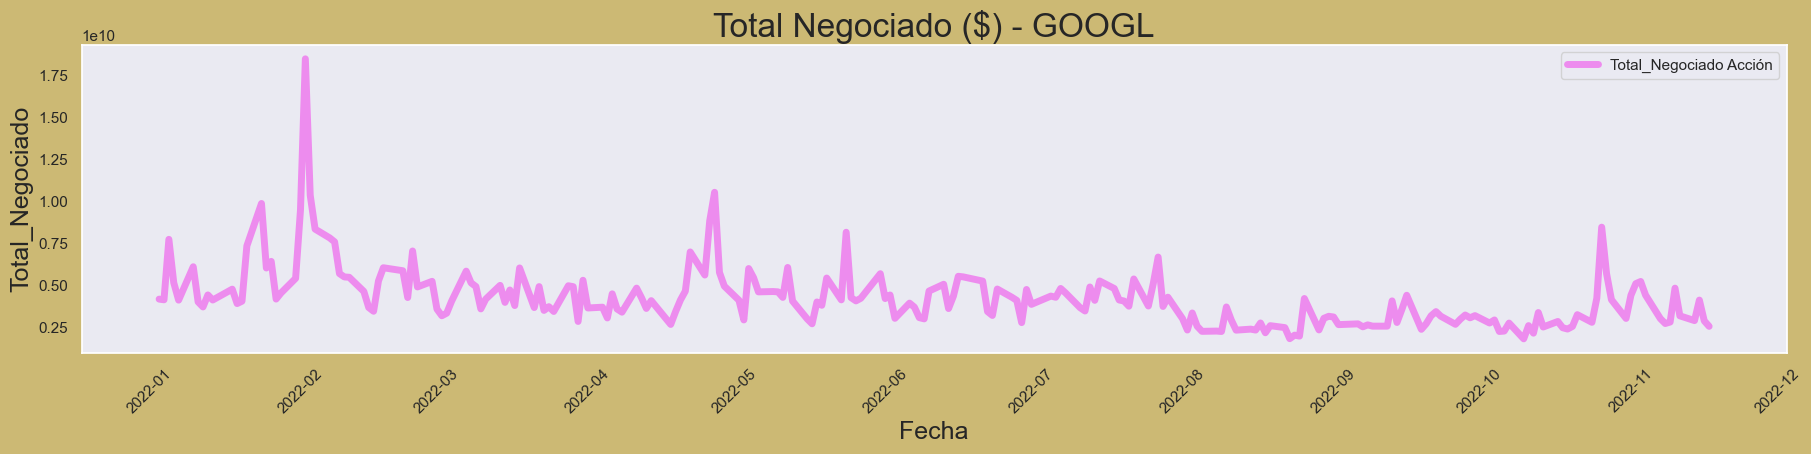

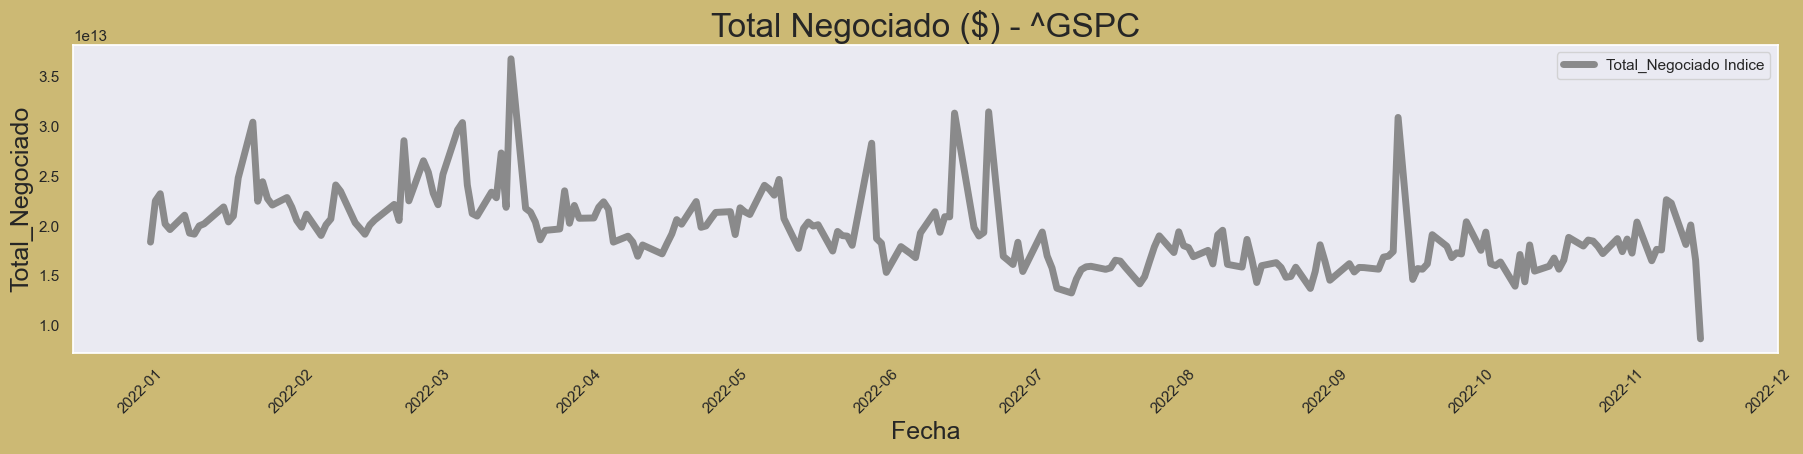

In [257]:
#plot the data
plt.figure(figsize=(22,4), facecolor="y")
plt.title("Total Negociado ($) - {}".format(asset), fontsize = 24)
plt.plot(df["Total_Negociado"], label = "Total_Negociado Acción", color = "violet", alpha = 0.9,lw = 5)
plt.ylabel("Total_Negociado", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper right")
plt.grid()
plt.show()

plt.figure(figsize=(22,4), facecolor="y")
plt.title("Total Negociado ($) - {}".format(ind_ticker), fontsize = 24)
plt.plot(df_ind["Total_Negociado"], label = "Total_Negociado Indice", color = "grey", alpha = 0.9,lw = 5)
plt.ylabel("Total_Negociado", fontsize = 18)
plt.xlabel("Fecha", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(loc = "upper right")
plt.grid()
plt.show()